# Sentiment Analyzer Engine

Importing essential libraries

In [1]:
import tweepy,re
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
# authentication
consumerKey = 'nAfAiljzt8Ntd1oatjYU2uvKc'
consumerSecret = 'JBJahC7nKS4q853V0vodZ8buaYGHwySv6u5XFm52dlownOqTRm'
accessToken = '4880646753-8TzBk1UEjuvXEXR2XL7uJ2ZFMRZnwNrDOioUHI9'
accessTokenSecret = 'CjAas3cB7A9OW7SJFA6SOkyfgv61MyN59W0g47ZSqBL2b'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
# input for term to be searched and how many tweets to be search
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))

tweets = []
tweetText = []
# searching for tweets
tweets = tweepy.Cursor(api.search, q=searchTerm+" -filter:retweets", lang = "en").items(NoOfTerms)

Enter Keyword/Tag to search about: Facebook
Enter how many tweets to search: 200


In [4]:
tweet_list = [tweet.text for tweet in tweets]
tweet_df = pd.DataFrame(tweet_list)
tweet_df

,0
0,@TMZ I think I found his Facebook https://t.co...
1,If you'd like to support a small business and ...
2,ola paola\n@bubbledom123\nI send pictures from...
3,It's funny how quickly everyone realized that ...
4,"Daily Cartoon: Tuesday, October 5th https://t...."
...,...
195,Mfers be damn near 45 on Facebook still lookin...
196,@Mexplosion_ @Pro_Superhero @BoSolaris I bough...
197,Come aad join us https://t.co/iRMluO8Dpo
198,Follow our awareness campaign and support our ...


# Cleaning the raw tweets that have been fetched

In [5]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())

tweet_df['cleaned_data'] = tweet_df[0].apply(clean_data)

In [6]:
tweet_df.head()

,0,cleaned_data
0,@TMZ I think I found his Facebook https://t.co...,I think I found his Facebook
1,If you'd like to support a small business and ...,If you d like to support a small business and ...
2,ola paola\n@bubbledom123\nI send pictures from...,ola paola I send pictures from Facebook and Pi...
3,It's funny how quickly everyone realized that ...,It s funny how quickly everyone realized that ...
4,"Daily Cartoon: Tuesday, October 5th https://t....",Daily Cartoon Tuesday October 5th via


Removing numbers from the tweets

In [7]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(drop_numbers)

In [8]:
tweet_df.head()

,0,cleaned_data
0,@TMZ I think I found his Facebook https://t.co...,I think I found his Facebook
1,If you'd like to support a small business and ...,If you d like to support a small business and ...
2,ola paola\n@bubbledom123\nI send pictures from...,ola paola I send pictures from Facebook and Pi...
3,It's funny how quickly everyone realized that ...,It s funny how quickly everyone realized that ...
4,"Daily Cartoon: Tuesday, October 5th https://t....",Daily Cartoon Tuesday October th via


Changing all the words of the cleaned data column to lowercase letters

In [9]:
def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lower_case)

In [10]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amrit.kaur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lemmatise)

In [12]:
tweet_df['cleaned_data'].values

array(['i think i found his facebook',
       'if you d like to support a small business and know someone who s getting married please send them my way i cover',
       'ola paola i send picture from facebook and pinterest to cote de pablo and all ncis actor i wish ev',
       'it s funny how quickly everyone realized that the facebook whistleblower wa a paid shill for censorship',
       'daily cartoon tuesday october th via',
       'outage or hack still a cybersecurity risk facebook outage yes it dns sort of a super quick analysis of what',
       'washington post facebook is harming our society here s a radical solution for reining it in',
       'i stayed off of fb a long a i could i m only on it now because i belong to a few group that com',
       'column in the last few year facebook ha become public enemy in the medium s imagination and mar',
       'facebook instagram whatsapp apps and desktop crash throughout the world on monday',
       'it would be important and indispensa

In [13]:
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(remove_stopword)

In [14]:
tweet_df['cleaned_data'].values

array(['think found facebook',
       'like support small business know someone getting married please send way cover',
       'ola paola send picture facebook pinterest cote de pablo ncis actor wish ev',
       'funny quickly everyone realized facebook whistleblower wa paid shill censorship',
       'daily cartoon tuesday october th via',
       'outage hack still cybersecurity risk facebook outage yes dns sort super quick analysis',
       'washington post facebook harming society radical solution reining',
       'stayed fb long could belong group com',
       'column last year facebook ha become public enemy medium imagination mar',
       'facebook instagram whatsapp apps desktop crash throughout world monday',
       'would important indispensable facebook company renew security pag',
       'request download today facebook going next saturday morning parent meal th',
       'algonquin park famous fall colour obtaining permit nothing new tom linklater wa working alone',
       'r

# Calculating polarity of the tweets

In [15]:
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"
    
tweet_df['polarity'] = tweet_df['cleaned_data'].apply(get_polarity)

In [16]:
tweet_df['polarity'].value_counts()

Neutral              91
Weakly Positive      36
Positive             29
Weakly Negative      28
Negative             10
Strongly Positive     4
Strongly Negative     2
Name: polarity, dtype: int64

In [17]:
tweet_df.dtypes

0               object
cleaned_data    object
polarity        object
dtype: object

In [32]:
neutral = 0
wpositive = 0
spositive = 0
positive = 0
negative = 0
wnegative = 0
snegative = 0
polarity = 0

for i in range(0,200):
    textblob = TextBlob(str(tweet_df['cleaned_data'][i]))
    polarity+= textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    if (pol == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (pol > 0 and pol <= 0.3):
        wpositive += 1
    elif (pol > 0.3 and pol <= 0.6):
        positive += 1
    elif (pol > 0.6 and pol <= 1):
        spositive += 1
    elif (pol > -0.3 and pol <= 0):
        wnegative += 1
    elif (pol > -0.6 and pol <= -0.3):
        negative += 1
    elif (pol > -1 and pol <= -0.6):
        snegative += 1


In [33]:
# finding average reaction
polarity = polarity / NoOfTerms
polarity

0.06402286255411253

In [34]:
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

In [35]:
 # finding average of how people are reacting
positive = percentage(positive, NoOfTerms)
wpositive = percentage(wpositive, NoOfTerms)
spositive = percentage(spositive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
wnegative = percentage(wnegative, NoOfTerms)
snegative = percentage(snegative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)

In [36]:
 # printing out data
print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
print()
print("-----------------------------------------------------------------------------------------")
print()
print("General Report: ")

if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print("Strongly Positive")
elif (polarity > -0.3 and polarity <= 0):
    print("Weakly Negative")
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")

print()
print("------------------------------------------------------------------------------------------")
print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

How people are reacting on Facebook by analyzing 200 tweets.

-----------------------------------------------------------------------------------------

General Report: 
Weakly Positive

------------------------------------------------------------------------------------------

Detailed Report: 
14.50% people thought it was positive
18.00% people thought it was weakly positive
2.00% people thought it was strongly positive
5.00% people thought it was negative
14.00% people thought it was weakly negative
1.00% people thought it was strongly negative
45.50% people thought it was neutral


In [37]:
sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
          'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 
          'Strongly Negative [' + str(snegative) + '%]']

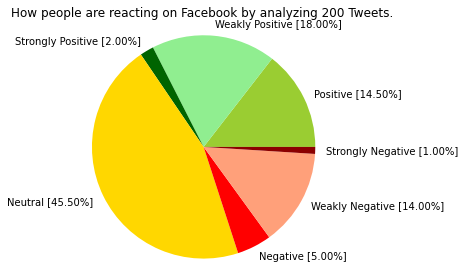

In [38]:
plt.pie(sizes, labels = labels, colors = colors)
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(NoOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()